# Consignas #4:
---
**A.** Usaremos la BBDD sqlite **<font color='red'>netflix_oscar.db</font>** que contiene la información de las tres tablas manteniendo el contexto, vamos a conectarla en deepnote. Usaremos el csv **<font color='red'>set_total.csv</font>**. **Todas las partes de está consigna seran realizadas en Deepnote**.

**B.** Haremos uso de todos los conocimientos previamente adquiridos. Muchas dudas ya fueron resueltas o tienen objetivos similares. 

**C. Contexto**
1. Trabajaremos con la última versión de la BBDD relacional **<font color='red'>netflix_oscar.db</font>**. Esta BBDD no está completa ni tiene todas las variables. Puede tener un comportamiento validable. Contiene errores que iremos trabajando durante el desarrollo del curso. No es el objetivo detectar todos los errores, pero sí aprender a reconocerlos y tratarlos adecuadamente. 
1. La tabla **'content'** tiene información de los contenidos de netflix en general. 
1. La tabla **'production'** tiene información de los contenidos originales de netflix. 
1. La tabla **'oscar'** que esta relacionada con los premios a la industria del entretenimiento, especificamente el cine.
1. Para referirnos a ciertos usos recurrentes usaremos las siglas siguientes:
|Referencia|siglas|
|:-------|:-------:|
|Bases de datos| BBDD|
|Hojas de cálculo|HHCC|
|DataFrame|DF ó df|


# 1.- Códigos de consultas con python

### 1.- Importar las librerías y métodos para conectar/desconectar la BBDD en deepnote:

a) Desarrolar (<font color='blue'>**en la celda de python ubicada abajo llamada**</font> `# des/conexión`) un código en python para la conexión/desconexión de la BBDD **<font color='red'>netflix_oscar.db</font>** .
Para ello:
    <b>i.</b> Debe crear un **primer método** para la conexión `get_connetion()` y que retorne la conexión (variable que llamaremos `conn`) y el cursor (variable que llamaremos `cur`).
    <b>ii.</b> Debe crear un **segundo método** para la desconexión `close_connetion()`. Debe cerrar ambas variables creadas anteriormente de forma adecuada.

In [5]:
# Des/conexión

import sqlite3 as sq3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display  # para mostrar display con el estilo DF de Jupiter Notebook

# CONEXION
def get_connetion():
    np.conn = sq3.connect(f'/work/Data/SQLite/{(database := "netflix_oscar.db")}')
    np.cur =  np.conn.cursor()
    return np.conn, np.cur #comunicación y conexión con la BBDD

# DESCONEXION
def close_connetion():
    np.cur.close()
    np.conn.close()

### 2.- Querys, python y DF de Pandas:
b) Desarrolar (<font color='blue'>en la celda de python ubicada abajo llamada </font> `# No nulos`) un código en python que obtenga los **no nulos** para la tabla **content** de la BBDD **<font color='red'>netflix_oscar.db</font>**, como lo realizado en las **consigna #2** y **consigna #3**, que genere un DF con estas características:
<center>
<table>
    <tr>
        <td > </td>
        <th style="border: 1px solid black; padding: 0px 10px 0px 10px"><font color='blue'>Nombre columna 1</font></th>
        <th style="border: 1px solid black; padding: 0px 10px 0px 10px"><font color='blue'>...</font></th>
        <th style="border: 1px solid black; padding: 0px 10px 0px 10px"><font color='blue'>...</font></th>
        <th style="border: 1px solid black; padding: 0px 10px 0px 10px"><font color='blue'>...</font></th>
        <th style="border: 1px solid black; padding: 0px 10px 0px 10px"><font color='blue'>Nombre columna n</font></th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 0px 10px 0px 10px">No nulos</td>
        <td style="border: 1px solid black; padding: 0px 10px 0px 10px"><font color='blue'>...</font></td>
        <td style="border: 1px solid black; padding: 0px 10px 0px 10px"><font color='blue'>...</font></td>
        <td style="border: 1px solid black; padding: 0px 10px 0px 10px"><font color='blue'>...</font></td>
        <td style="border: 1px solid black; padding: 0px 10px 0px 10px"><font color='blue'>...</font></td>
        <td style="border: 1px solid black; padding: 0px 10px 0px 10px"><font color='blue'>...</font></td>
    </tr>
</table></center></br>

Para ello:
* Debe haber ejecutado la celda que hemos llamado `# Des/conexión`
* Debe llamar al método que le permita conectarse a la base de datos y recuerde que recibe una tupla como respuesta. Maneje cada recurso como le sea conveniente. De esta forma:
    <b>i.</b> Obtenga el DF con la query que sea necesaria junto al método `.read_sql()` de pandas, puede revisar el crud para recordar como hacerlo. 
* No olvide cerrar la conexión.
    
<font color='green'>**DESAFIOS**</font>  

Desarrollar los siguientes códigos para:   
    <b>I.</b> Completar el DF obtenido en la **consigna #6** (**2.b.i**) con los **nulos, vacios y distintos** para la tabla **content**.
    <b>II.</b>  El mismo DF obtenido en **2.b.I** pero para las tablas de la BBDD **production** y **oscar**.
<font color='blue'>Puede desarrollarlos en la misma celda de python llamada </font> `# No nulos`.
**<font color='blue'>¡Tip puede ser útil el método `.concat()` de pandas!</font>**  

In [6]:
# No nulos
# Para ejecutar esta celda debe haberse ejecutado la primera celda llamada # Des/conexión

np.conn, np.cur = get_connetion()

query_tables = '''SELECT *
FROM SQLITE_MASTER 
WHERE TYPE = 'table' AND name NOT LIKE 'sqlite%'
'''
df_tables = pd.read_sql(query_tables, np.conn)
dict_table_column = {table:list(pd.read_sql(f"SELECT name FROM PRAGMA_TABLE_INFO('{table}');",np.conn).name) for table in df_tables.name}
index_df = ['NO NULOS', 'VACIOS', 'NULOS', 'DISTINTOS']
#print(dict_table_column)

#Respuesta i 
df_cont_notnull = pd.DataFrame(index=[index_df[0]])
key = 'content'

print('2.b.i')
for element in dict_table_column[key]:
    query_notnull_content = f"SELECT COUNT('{element}') as {element} FROM {key} WHERE '{element}' IS NOT NULL"
    df_notnull_content = pd.read_sql(query_notnull_content,np.conn)
    df_notnull_content.index = [index_df[0]]
    df_cont_notnull = pd.concat([df_cont_notnull,df_notnull_content], axis=1)
display(df_cont_notnull)


OperationalError: unable to open database file

c)  Desarrolar (<font color='blue'>en la celda de python ubicada abajo llamada </font> `# Consultas en DF`) un código en python que permita realizar las siguientes consultas sobre las tabla de la BBDD **<font color='red'>netflix_oscar.db</font>** , como lo realizado en las **consigna #2** y **consigna #3**:  
Para ello:
*   Debe haber ejecutado la celda que hemos llamado `# Des/conexión`
*   Debe llamar al método que le permita conectarse a la base de datos y recuerde que recibe una tupla como respuesta. Maneje cada recurso como le sea conveniente.
*   Obtener el DF de cada una de las tablas de la BBDD con la query apropiada, junto al método `.read_sql()` de pandas, puede revisar el crud para recordar cómo hacerlo. 
*   Finalmente use las estrategías de consulta que sean convenientes para realizar cada una de las siguientes instrucciones (considera  almacenar el DF para cada ejercicio):  
    <b>i.</b>  Listar todos los registros de la tabla, visualizando las columnas type, title_content, country, rating, duration, listed_in. 
    <b>ii.</b>  Generar un listado de todas las películas en las que participe Argentina, mostrando las columnas id_content, type, title_content, director, cast, rating, duration, listed_in.
    <b>iii.</b>  Presentar un listado con las columnas id_production, title_production, genre, language, imdb_score de los registros de la tabla en las que el imdb_score sea superior a 7.5.
    <b>iv.</b> Seleccionar los títulos con runtime superior a 90 y lenguaje Francés. Incluir el tipo de contenido. Ordenar los títulos de menor a mayor. 
* No olvide cerrar la conexión.
<font color='green'>**DESAFIOS**</font>:
Realizar las siguientes instrucciones (considera  almacenar el DF para cada ejercicio):   
    <b>I.</b>  Todas las filas de la tabla, presentando solo las columnas id_content, title_production, genre, runtime, imdb_Score.
    <b>II.</b>  Mostrar las columnas id_content, type, title_content, listed_in de los registros en los que el rating sea público general o admitido para todas las edades. 
    <b>III.</b>  Las columnas id_production, title_production, genre de los registros en que duration sea menor o igual a 105 minutos pero que además tenga una duración de al menos 60 minutos.
    <b>IV.</b>  Mostrar la cantidad  de películas en los idiomas portugués, francés, alemán, italiano y español, ordenados por cantidad, de mayor a menor.
    <b>V.</b> Sume el Runtime de las películas que tengan como único país de origen United States, India, Japan, Spain y Mexico, discriminando y ordenando por país. Incluya la columna género.
    <b>VI.</b> Analizar la relación entre Budget y Box Office. Calcular el ratio Budget/Box Office para las peliculas con un puntaje IMDB entre 7 y 9, sin mostrar nulos y no repetidos.
    <b>VII.</b> Mostrar una lista de las películas originales de netflix ganadoras del oscar (si las hubiera) mostrando las columnas title, category, genre runtime, el imdb_score, la premiere y el año de la ceremonia.

**<font color='blue'>¡Tip en algunos casos pueden ser utiles el método `.str.contains()` de python y los métodos `.merge()`, `.query()`, `.fillna()`, `.groupby()`, `.count()`, `.dropna()`, `.drop()`,`.sum()`, `.sort_index()`, `.reset_index()`, `.drop_duplicates()` y `.sort_values()` o usos de slice simple como otros métodos de filtrados de pandas para obtener los resultados!</font>**
<font color='blue'>Puede desarrollarlos en la misma celda de python ubicada abajo llamada </font> `# Consultas en DF`. 

In [ ]:
# Consultas en DF
# Para ejecutar esta celda debe haberse ejecutado la primera celda llamada # Des/conexión
np.conn, np.cur = get_connetion()

def query_all(table):
    return f'SELECT * FROM "{table}";'

df_cont_all = pd.read_sql(query_all('content'), np.conn)
df_prod_all = pd.read_sql(query_all('production'), np.conn)
df_oscar_all = pd.read_sql(query_all('oscar'), np.conn)

print('2.c.i')
df_cont_all_i = df_cont_all[['type','title_content','country','rating','duration','listed_in']]
display(df_cont_all_i)

print('2.c.ii')
df_cont_all_ii = df_cont_all[['id_content','type','title_content','director','country','cast','rating','duration','listed_in']].fillna('')
df_cont_all_ii = df_cont_all_ii[df_cont_all_ii['country'].str.contains('Argentina')][['id_content','type','title_content','director','country','cast','rating','duration','listed_in']]
display(df_cont_all_ii)

print('2.c.iii')
df_prod_all_iii = df_prod_all[['id_production','title_production','genre','language','imdb_score']].fillna('')
df_prod_all_iii = df_prod_all_iii[df_prod_all_iii['imdb_score']>7.5][['id_production','title_production','genre','language','imdb_score']]
display(df_prod_all_iii)

print('2.c.iv')
df_prod_all_iv =  df_prod_all[['id_content', 'title_production', 'runtime', 'language']].fillna('')
df_prod_all_iv =  df_prod_all_iv[(df_prod_all_iv['runtime']>90)&(df_prod_all_iv['language']=='French')][['id_content', 'title_production', 'runtime', 'language']]
df_prod_all_iv= pd.merge(df_prod_all_iv,df_cont_all,how='inner',on='id_content')
df_prod_all_iv_fin =  df_prod_all_iv[['id_content', 'title_production', 'runtime', 'language','type']]
display(df_prod_all_iv_fin)



2.c.i


,type,title_content,country,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,None,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,None,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...
8740,Movie,Zodiac,United States,R,158 min,"Cult Movies, Dramas, Thrillers"
8741,TV Show,Zombie Dumb,None,TV-Y7,2 Seasons,"Kids TV, Korean TV Shows, TV Comedies"
8742,Movie,Zombieland,United States,R,88 min,"Comedies, Horror Movies"
8743,Movie,Zoom,United States,PG,88 min,"Children & Family Movies, Comedies"


2.c.ii


,id_content,type,title_content,director,country,cast,rating,duration,listed_in
139,141,Movie,"El patrón, radiografía de un crimen",Sebastián Schindel,"Argentina, Venezuela","Joaquín Furriel, Luis Ziembrowski, Guillermo P...",TV-MA,100 min,"Dramas, International Movies, Thrillers"
272,276,TV Show,The Kingdom,,Argentina,"Chino Darín, Nancy Dupláa, Joaquín Furriel, Pe...",TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis..."
299,304,Movie,Esperando la carroza 2,Gabriel Condron,Argentina,"Luis Brandoni, Betiana Blum, Roberto Carnaghi,...",TV-MA,88 min,"Comedies, Cult Movies, International Movies"
301,306,Movie,Tango Feroz,Marcelo Piñeyro,"Argentina, Spain","Fernán Mirás, Cecilia Dopazo, Imanol Arias, Hé...",TV-MA,124 min,"Classic Movies, Dramas, International Movies"
430,435,TV Show,Okupas,,Argentina,"Rodrigo de la Serna, Diego Alonso, Ariel Stalt...",TV-MA,1 Season,"Classic & Cult TV, Crime TV Shows, Internation..."
...,...,...,...,...,...,...,...,...,...
7744,7801,TV Show,Psiconautas,,Argentina,"Guillermo Toledo, Gabriel Goity, Florencia Peñ...",TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh..."
8105,8164,Movie,Temporada de Caza,Natalia Garagiola,"Argentina, France, United States, Germany, Qatar","Germán Palacios, Lautaro Bettoni, Boy Olmi, Ri...",TV-MA,108 min,"Dramas, International Movies"
8127,8186,Movie,The Aerial,Esteban Sapir,Argentina,"Rafael Ferro, Sol Moreno, Jonathan Sandor, Ale...",TV-MA,99 min,"Dramas, International Movies, Sci-Fi & Fantasy"
8214,8274,Movie,The Desert Bride,"Cecilia Atán, Valeria Pivato","Argentina, Chile","Paulina García, Claudio Rissi",TV-14,78 min,"Dramas, International Movies"


2.c.iii


,id_production,title_production,genre,language,imdb_score
33,34,Seaspiracy,Documentary,English,8.2
84,86,If Anything Happens I Love You,Animation / Short,English,7.8
88,90,Ludo,Anthology/Dark comedy,Hindi,7.6
105,107,The Trial of the Chicago 7,Drama,English,7.8
108,110,The Three Deaths of Marisela Escobedo,Documentary,Spanish,8.2
112,114,David Attenborough: A Life on Our Planet,Documentary,English,9.0
128,130,The Social Dilemma,Documentary,English,7.6
129,131,My Octopus Teacher,Documentary,English,8.1
160,163,Athlete A,Documentary,English,7.6
183,186,A Secret Love,Documentary,English,7.9


2.c.iv


,id_content,title_production,runtime,language,type
0,896,Oxygen,101,French,Movie
1,1111,Madame Claude,112,French,Movie
2,1330,The Misadventures of Hedi and Cokeman,99,French,Movie
3,1439,Tony Parker: The Final Shot,98,French,Movie
4,1781,Rogue City,116,French,Movie
5,1985,GIMS: On the Record,96,French,Movie
6,2164,Anelka: Misunderstood,94,French,Movie
7,2359,Lost Bullet,92,French,Movie
8,3426,Street Flow,96,French,Movie
9,4660,The Most Assassinated Woman in the World,102,French,Movie


d)  Desarrolar el código en python que permita realizar las siguientes instrucciones en el **<font color='red'>set_total.csv</font>** (<font color='blue'>en la celda llamada </font> `# HHCC en DF`), como lo realizado en las **consignas #3 y #4**:
Para ello:
*   Debe haber ejecutado la celda que hemos llamado `# Des/conexión`
*   Obten el DF de cada del csv con el método `.read_csv()` de pandas. 
*   Finalmente use las estrategías de consulta apropiadas para:  
    <b>i</b> Buscar registros duplicados y eliminarlos. <font color='blue'>**Tip puede usar los métodos `.duplicated()`, `.sum()` y `.drop_duplicates()` de pandas.**</font>
    
    <b>ii</b> Chequear el formato de los datos (numérico en las columnas en que deba haber números, texto en las columnas correspondientes, etc.). <font color='blue'>**Tip puede usar el atributo `.dtypes` y los métodos `.fillna()` y `.astype()` de pandas.**</font>
        
<font color='green'>**DESAFIOS**</font>:

Realizar las siguientes instrucciones (considera  almacenar el DF para cada ejercicio): 
   <b>I</b> Separar la columna "duration" en dos: en "duration" deben quedar solo los números, mientras que la que quede con los textos deben llamarla "tiempo_temporadas". <font color='blue'>**Tip puede usar el método `.str.split()` de python y los métodos `.index()`, `.reindex()`, `.insert()` y `.pop()` de pandas.**</font>  

   <b>II.</b> Construir un DF  que muestre de manera descendente los 15 países que tienen mayor cantidad total de títulos en la plataforma, desglosando por tipo de contenido. <font color='blue'>**Tip puede usar puede usar el método `.str.contains()` de python y los métodos `.count()`, `.unstack()`, `.groupby()`, `.fillna()`, `.head()`, y `.sot_values()` de pandas. Recuerde que para el filtrado en pandas `~ es not`, `& es and` y `| es or` y encerrar entre paréntesis las operaciones lógicas.**</font>  
  
   <b>III.</b> Mostrar las películas clasificadas como **drama** por netflix, que hayan ganado el Oscar entre 2010 y 2020 y que estén en esta plataforma. <font color='blue'>**Tip puede usar el método `.str.contains()` de python y los métodos `.notna()`, `.isin()`, `.count()`, `.groupby()`, `.merge()` y `.reset_index()` de pandas.**</font>
    
   <b>IV.</b> Construir un DF que muestre el nombre de las películas nominadas, el año de la ceremonia correspondiente, la cantidad de nominaciones y la cantidad de oscar ganados. Agregar una columna que sea el resultado de calcular la relación entre estatuillas ganadas y nominaciones totales. Organizar la tabla con mayor o igual a 10 nominaciones y de mayor a menor por esa de la relación calculada, limitada sólo a las 20 películas de mejor perfomance en los oscar. <font color='blue'>**Tip puede usar los métodos `.sum()`, `.count()`, `.groupby()`, `.reset_index()` y `.sot_values()` de pandas.**</font>
    
   <b>V</b> Construir un DF que tenga: 1) Una columna con el nombre de los actores/actrices, llamada 'nombres', 2) otra columna llamada 'genero' que indique "Femenino" o "Masculino" en los registros que tienen como categorias ACTOR, ACTOR IN A LEADING ROLE, ACTOR IN A SUPPORTING ROLE, ACTRESS, ACTRESS IN A LEADING ROLE, ACTRESS IN A SUPPORTING ROLE, según corresponda.  3) otra columna que muestre la cantidad de nominaciones al oscar, llamada 'nominaciones' y 4) otra columna que muestre la  la cantidad de victorias al oscar, llamada 'ganados'.  Luego organízalo de mayor a menor por la columna de nominaciones y por la columna de ganados. <font color='blue'>**Tip puede usar el método `.str.contains()` de python y los métodos `.values_counts()`, `.count()`, `.groupby()`, `.merge()`, `.drop_duplicates()`,`.set_index()`, `.concat()`, `.sum()`, `.cumsum()`, `.to_frame()`, `.rename_axis()`, `.reset_index()` y `.sot_values()` de pandas.**</font>

<font color='blue'>Puede desarrollarlos en la misma celda de python ubicada abajo llamada </font> `# HHCC en DF`.  


In [ ]:
# HHCC en DF
# Para ejecutar esta celda debe haberse ejecutado la primera celda llamada # Des/conexión

df_set_total = pd.read_csv('/work/Data/CSV/set_total.csv')

print('2.d.i')
df_set_total.duplicated().sum()
display(df_set_total[df_set_total.duplicated(keep=False)])
display_1 = display(df_set_total.shape)
df_set_total.drop_duplicates(inplace=True)
display_2 = display(df_set_total.shape)

print('2.d.ii')
print(df_set_total.dtypes)
df_set_total['id_content'].fillna(0,inplace=True)
df_set_total['id_content']= df_set_total['id_content'].astype('int64')
print()
print(df_set_total.dtypes)
print(f"Columna id_content cambiada a {df_set_total['id_content'].dtypes}")



2.d.i


,id_content,type,title_content,release_year,cast,director,country,rating,duration,listed_in,...,title_oscar,category,name,year_ceremony,winner,directed_by,starring,budget_x_million,box_office_x_million,imdb
11124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,The Lion King,MUSIC (Original Song),Music by Elton John. Lyric by Tim Rice,1995.0,0.0,['Roger Allers'. 'Rob Minkoff'],['Matthew Broderick'. 'Jonathan Taylor Thomas'...,45.0,968.5,8.5
11125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,The Lion King,MUSIC (Original Song),Music by Elton John. Lyric by Tim Rice,1995.0,0.0,['Roger Allers'. 'Rob Minkoff'],['Matthew Broderick'. 'Jonathan Taylor Thomas'...,45.0,968.5,8.5
11409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yentl,MUSIC (Original Song),Music by Michel Legrand. Lyric by Alan Bergman...,1984.0,0.0,Barbra Streisand,['Barbra Streisand'. 'Mandy Patinkin'. 'Amy Ir...,16.0,40.2,6.6
11410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yentl,MUSIC (Original Song),Music by Michel Legrand. Lyric by Alan Bergman...,1984.0,0.0,Barbra Streisand,['Barbra Streisand'. 'Mandy Patinkin'. 'Amy Ir...,16.0,40.2,6.6


(11427, 23)

(11425, 23)

2.d.ii
id_content              float64
type                     object
title_content            object
release_year            float64
cast                     object
director                 object
country                  object
rating                   object
duration                 object
listed_in                object
runtime                 float64
imdb_score              float64
language                 object
title_oscar              object
category                 object
name                     object
year_ceremony           float64
winner                  float64
directed_by              object
starring                 object
budget_x_million        float64
box_office_x_million    float64
imdb                    float64
dtype: object

id_content                int64
type                     object
title_content            object
release_year            float64
cast                     object
director                 object
country                  object
rating            

### 3.- Python, DF de Pandas y Visualización:
e)  Desarrolar un código en python que permita realizar las siguientes instrucciones en la BBDD **<font color='red'>netflix_oscar.db</font>** (<font color='blue'>en la celda llamada </font> `# Matplotlib`), como en la **consigna #4**: 
Para ello:
*   Debe haber ejecutado la celda que hemos llamado `# Consultas en DF,` puesto que va a usar cada DF de las tablas de la BBDD, según sea necesario. 
*   Utilice las estrategías de gráficación de matplotlib apropiadas para realizar cada una de las siguientes instrucciones:  
   <b>i.</b> Realizar un gráfico que muestre la relación entre la cantidad de series y películas disponibles en Netflix. <font color='blue'>**Tip puede usar los métodos `.groupby()` y `.count()` de pandas para el tratamiento de los datos.**</font>
   
   <b>ii.</b> Realizar un gráfico a partir de los países que tienen mayor cantidad total de títulos en la plataforma, desglosando por tipo de contenido, mostrando la información sólo para los primeros 10 países (mostrar el desglose por tipo de contenido), Obvie las cooperaciones entre países. <font color='blue'>**Tip puede usar el método `.str.contains()` de python y los métodos usados en el ejercicio anterior ademas de `.fillna()`, `.head()`, `.drop()`, `.isnull()`, `.unstack()` y `.sort_values()`, de pandas. Recuerde que para el filtrado en pandas `~ es not`, `& es and` y `| es or` y encerrar entre paréntesis las operaciones lógicas.**</font>
    
<font color='green'>**DESAFIOS**</font>:  

Realizar las siguientes instrucciones, (considera  almacenar el DF para cada ejercicio):   
   <b>I.</b> Diseña una gráfica de barras apiladas que muestre la cantidad total de títulos estrenados por año desglosando por tipos (movie o TV Show) desde el año 2008 hasta la actualidad. <font color='blue'>**Tip puede usar los métodos `.fillna()`, `.head()`, `.drop()`, `.groupby()`, `.sort_index()`, `.isnull()`, `.unstack()` y `.sort_values()` de pandas. Recuerde que para el filtrado en pandas `~ es not`, `& es and` y `| es or` y encerrar entre paréntesis las operaciones lógicas.**</font>

   <b>II.</b> Diseña una gráfica de líneas que muestre la cantidad total de títulos estrenados por año desglosando por tipos (movie o TV Show) desde el año 2008 hasta la actualidad. <font color='blue'>**Tip puede usar los métodos `.fillna()`, `.head()`, `.drop()`, `.groupby()`, `.sort_index()`, `.isnull()`, `.unstack()` y `.sort_values()` de pandas. Recuerde que para el filtrado en pandas `~ es not`, `& es and` y `| es or` y encerrar entre paréntesis las operaciones lógicas.**</font> 

<font color='blue'>**Tip para los gráficos puede usar los métodos `plt.xticks()`, `ax.set_title()`, `ax.legend()`, `ax.set_ylim()`, `ax.bar_label()` y `plt.subplots()` de matplotlib o sus equivalentes.**</font>
<font color='blue'>Puede desarrollarlos en la celda de python llamada </font> `# Matplotlib`.  

3.e.i


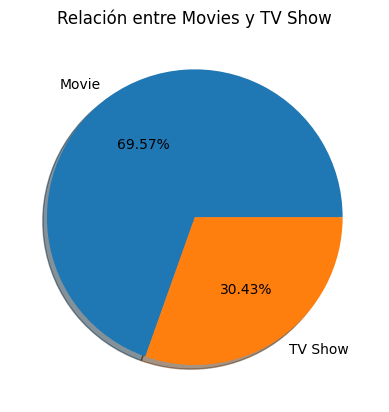

3.e.ii


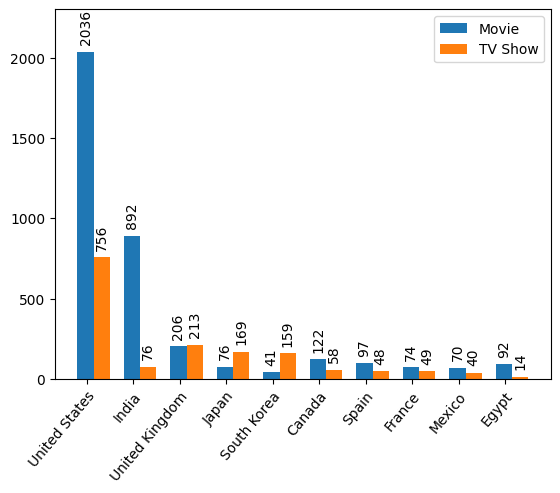

In [ ]:
# Matplotlib
# Para ejecutar esta celda debe haberse ejecutado la tercera celda llamada # Consultas en DF

print('3.e.i')
fig, ax = plt.subplots()
ax.pie(df_cont_all['type'].value_counts(), labels = df_cont_all['type'].value_counts().index, autopct='%1.2f%%',shadow = True)
#df_cont_all['type'].value_counts()
#df_cont_all['type'].value_counts().index
ax.set_title("Relación entre Movies y TV Show")
plt.show()

print('3.e.ii')
df_values = df_cont_all[~df_cont_all['country'].isnull()][['country','type']]
df_values = df_values[~df_values['country'].str.contains(',')]
df_values_group = df_values.groupby(['country','type'])['type'].count().unstack().fillna(0)
#df_values_group

df_values_group['Total'] = df_values_group['Movie']+df_values_group['TV Show']
df_values_group = df_values_group.sort_values('Total', ascending=False).head(10)
#df_values_group
df_values_group.drop('Total', axis ='columns',inplace=True)
#df_values_group

#Gráfico: 
n = len(df_values_group.index)
x = np.arange(n)
width = 0.35
value_mul = 0.5
fig,ax = plt.subplots()
for index_value in list(df_values_group.columns):
    p = ax.bar(x - value_mul*width, df_values_group[index_value], width=width, label=index_value)
    value_mul = -0.5
    ax.bar_label(p,padding=5, rotation=90)

plt.xticks(x - 0.15, df_values_group.index, rotation=50, ha='right', rotation_mode = 'anchor')
ax.legend(loc = 'best')
ax.set_ylim(0,2300)
plt.show()


f)  Desarrolar un código en python que permita realizar las siguientes instrucciones en la BBDD **<font color='red'>netflix_oscar.db</font>** (<font color='blue'>en la celda de python ubicada abajo llamada </font> `# Seaborn`): 
Para ello:
*   Debe haber ejecutado la celda que hemos llamado `# Consultas en DF` puesto que va a usar cada DF de las tablas de la BBDD según sea necesario. 
*   Finalmente use las estrategías de gráficación en seaborn que sean convenientes para realizar cada una de las siguientes instrucciones:  

   <b>i.</b> Construir un gráfico que muestre de forma descendente el top 20 de directores con más producciones. <font color='blue'>**Tip puede usar los métodos `.count()`, `.cumsum()`, `.head()`, `.to_frame()`, `.isin()`, `.reset_index()`, `.groupby()`, `.sort_values()`, `.isnull()`, `.unstack()` y `.set_index()` de pandas. Recuerde que para el filtrado en pandas `~ es not`, `& es and` y `| es or` y encerrar entre paréntesis las operaciones lógicas.**</font> 

   <b>ii.</b> Construir un gráfico que muestre de forma descendente los 20 géneros de Netflix con mayor cantidad de producciones.  <font color='blue'>**Tip puede usar los métodos  `.count()`, `.cumsum()`, `.head()`, `.to_frame()`, `.isin()`, `.reset_index()`, `.groupby()`, `.sort_values()`, `.isnull()`, `.unstack()` y `.set_index()` de pandas. Recuerde que para el filtrado en pandas `~ es not`, `& es and` y `| es or` y encerrar entre paréntesis las operaciones lógicas.**</font> 

   <b>iii.</b> Construir un gráfico que muestre de forma descendente todas las clasificaciones por público (rating) desglosando por tipo de contenido. <font color='blue'>**Tip puede usar los métodos  `.count()`, `.copy()`, `.head()`, `.reset_index()`, `.groupby()`, `.sort_values()`, `.isnull()`, `.unstack()` y `.set_index()` de pandas. Recuerde que para el filtrado en pandas `~ es not`, `& es and` y `| es or` y encerrar entre paréntesis las operaciones lógicas.**</font> 

   <b>iv.</b> Construir un gráfico que muestre de forma descendente los 15 idiomas de películas con mayor cantidad de títulos, sin contar inglés. <font color='blue'>**Tip puede usar los métodos `.fillna()`, `.count()`, `.cumsum()`, `.head()`, `.reset_index()`, `.groupby()`, `.sort_values()`, `.isnull()`, `.unstack()` y `.set_index()` de pandas. Recuerde que para el filtrado en pandas `~ es not`, `& es and` y `| es or` y encerrar entre paréntesis las operaciones lógicas.**</font> 
    

3.f.i


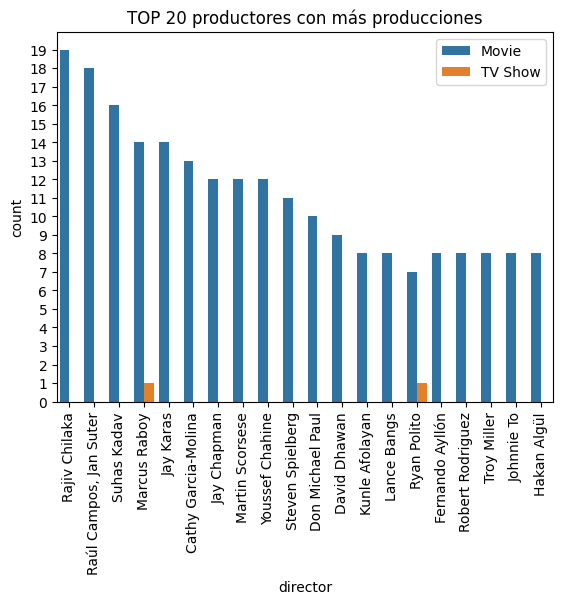

3.f.ii


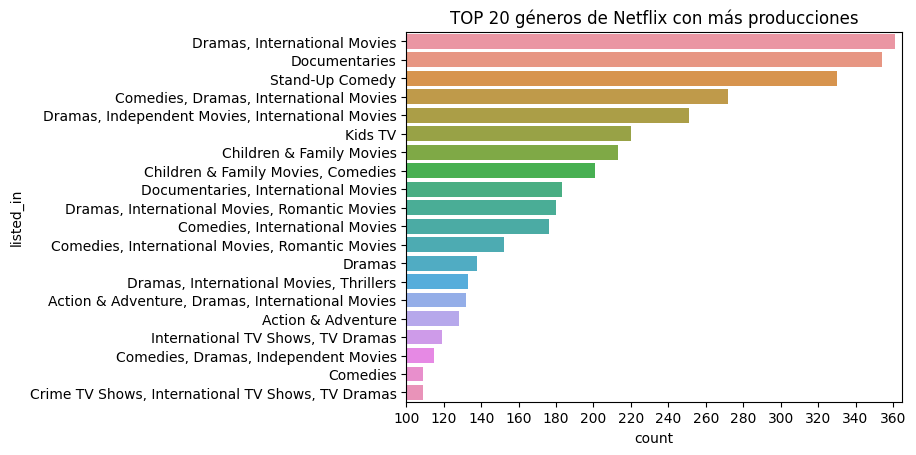

3.f.iii


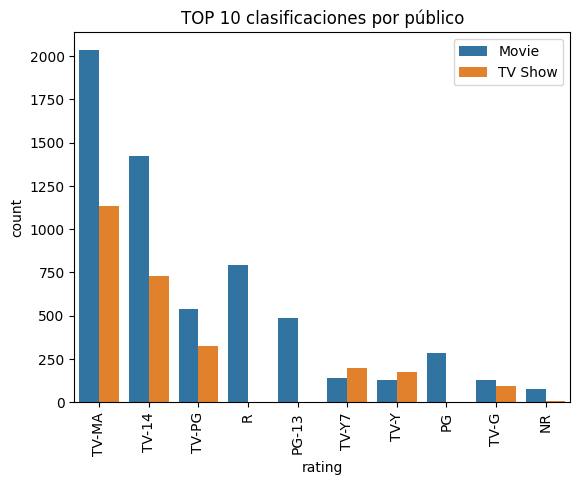

3.f.iv


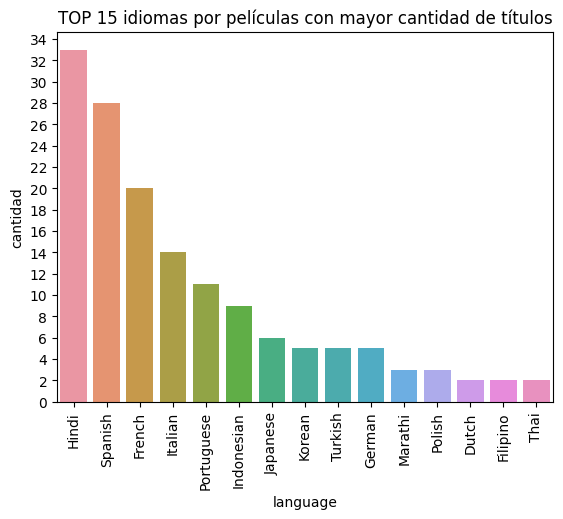

In [ ]:
# Seaborn
# Para ejecutar esta celda debe haberse ejecutado la tercera celda llamada # Consultas en DF
from math import e

print('3.f.i')
df_cont_all_i = df_cont_all[(~df_cont_all['director'].isnull())][['type','director']]
df_cont_all_i = df_cont_all_i.groupby(['director','type'])['type'].count().unstack().fillna(0)
#df_cont_all_i
df_cont_all_i['Total'] = df_cont_all_i['Movie']+df_cont_all_i['TV Show']
df_cont_all_i = df_cont_all_i.sort_values('Total', ascending=False).head(20)
#df_cont_all_i
df_cont_all_i_seg = df_cont_all[(df_cont_all['director'].isin(df_cont_all_i.index))]
#df_cont_all_i_seg 
fig,ax = plt.subplots()
sns.countplot(data = df_cont_all_i_seg,x='director',hue='type',order=df_cont_all_i.index)
ax.set_xticklabels(df_cont_all_i.index, rotation=90)
ax.set_yticks(range(0, 20))
ax.legend(loc='best')
ax.set_title("TOP 20 productores con más producciones")
plt.show()

print('3.f.ii')
df_cont_all_ii=df_cont_all[(~df_cont_all['listed_in'].isnull())]
#df_cont_all_ii
df_cont_all_ii = df_cont_all_ii.groupby(['listed_in'])['listed_in'].count()
df_cont_all_ii = df_cont_all_ii.groupby(level=[0]).cumsum().to_frame('cantidad')
#df_cont_all_ii
df_cont_all_ii = df_cont_all_ii.sort_values('cantidad', ascending=False).head(20)
#df_cont_all_ii
df_cont_all_ii_seg = df_cont_all[(df_cont_all['listed_in'].isin(df_cont_all_ii.index))]
fig, ax = plt.subplots()
sns.countplot(data=df_cont_all_ii_seg, y='listed_in',order=df_cont_all_ii.index)
ax.set_xticks(range(100,370,20))
ax.set_xlim(100,365)
ax.set_title("TOP 20 géneros de Netflix con más producciones")
plt.show()

print('3.f.iii')
df_cont_all_iii = df_cont_all[(~df_cont_all['rating'].isnull())][['type','rating']]
df_cont_all_iii_seg = df_cont_all_iii.copy()
df_cont_all_iii = df_cont_all_iii.groupby(['rating','type'])['type'].count().unstack().fillna(0)
#df_cont_all_iii 
df_cont_all_iii['Total'] = df_cont_all_iii['Movie']+df_cont_all_iii['TV Show']
df_cont_all_iii = df_cont_all_iii.sort_values('Total', ascending=False).reset_index().head(10)
#df_cont_all_iii
fig, ax = plt.subplots()
sns.countplot(data=df_cont_all_iii_seg, x='rating', hue='type', order=df_cont_all_iii['rating'])
ax.set_xticklabels(df_cont_all_iii.rating, rotation=90)
ax.legend(loc='best')
ax.set_title("TOP 10 clasificaciones por público")
plt.show()

print('3.f.iv')
df_prod_all_iv = df_prod_all[(~df_prod_all['language'].isnull()) & (~df_prod_all['language'].str.contains('English')) &(~df_prod_all['language'].str.contains('/'))][['language']]
#df_prod_all_iv
df_prod_all_iv = df_prod_all_iv.groupby(['language'])['language'].count().groupby(level=[0]).cumsum().to_frame('cantidad')
#df_prod_all_iv
df_prod_all_iv = df_prod_all_iv.sort_values('cantidad', ascending=False).reset_index().head(15)
#df_prod_all_iv
fig, ax = plt.subplots()
sns.barplot(data=df_prod_all_iv, x='language', y='cantidad', order=df_prod_all_iv['language'])
ax.set_xticklabels(df_prod_all_iv.language, rotation=90)
ax.set_yticks(range(0,36,2))
ax.set_title("TOP 15 idiomas por películas con mayor cantidad de títulos")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7980bf71-2afe-4691-889b-dcc069bc831c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>